 # 실시간 객체 검출 (Real-time Object Detection)

## YOLO-v8 야르

In [1]:
import ultralytics
from IPython import display
display.clear_output()
ultralytics.checks()

Ultralytics 8.3.202  Python-3.13.7 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Setup complete  (32 CPUs, 15.7 GB RAM, 358.1/931.5 GB disk)


In [2]:
import yaml


# data.yaml 파일을 읽어 환경 설정 내용 불러오기
with open('./Datasets/data.yaml') as f:
    conf = yaml.safe_load(f)

number_of_classes = conf['nc']
class_names = conf['names']

print('클래스 개수:', number_of_classes)
print('클래스 이름:', class_names)

클래스 개수: 2
클래스 이름: ['Normal', 'Swelling']


In [3]:
import os


train_path = './Datasets/train/'
valid_path = './Datasets/valid/'

train_file_list = os.listdir(train_path + 'images/')
valid_file_list = os.listdir(valid_path + 'images/')

print(f'학습 데이터 개수: {len(train_file_list)}')
print(f'평가 데이터 개수: {len(valid_file_list)}')

학습 데이터 개수: 59
평가 데이터 개수: 12


클래스: 0, 중심 좌표: (0.15859, 0.49596), 너비: 0.26110, 높이: 0.84657


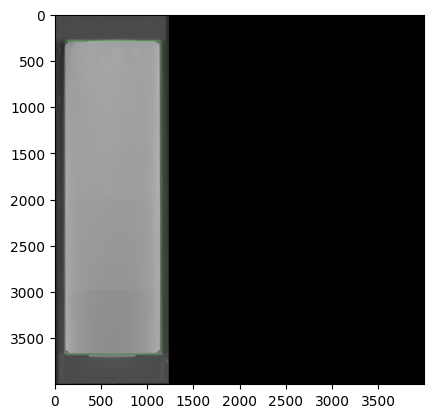

In [4]:
import matplotlib.pyplot as plt
import cv2

image_name="CT_cell_pouch_102_x_009.jpg"

img = cv2.imread(valid_path + 'images/' + image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV는 기본적으로 BGR 형식을 따르므로, RGB 형식으로 변경

label_name = 'CT_cell_pouch_102_x_009.txt'

# 특정한 레이블 파일을 읽어 확인
with open(valid_path + 'labels/' + label_name) as f:
    # 각 객체(object)의 바운딩 박스 정보를 하나씩 확인하며
    for instance in f.readlines():
        image_width, image_height = 4000,4000

        label, x, y, width, height = map(float, instance.strip().split())
        print(f'클래스: {int(label)}, 중심 좌표: ({x:.5f}, {y:.5f}), 너비: {width:.5f}, 높이: {height:.5f}')

        if int(label) == 0:
            c = (0, 255, 0) # mask인 경우 초록색
        elif int(label) == 1:
            c = (255, 0, 0) # no-mask인 경우 빨간색

        # 왼쪽 위 좌표와 오른쪽 아래 좌표
        x1, y1 = image_width * (x - width / 2), image_height * (y - height / 2)
        x2, y2 = image_width * (x + width / 2), image_height * (y + height / 2)

        # 사각형 그리기
        cv2.rectangle(
            img,
            (int(x1), int(y1)), # 왼쪽 위 좌표
            (int(x2), int(y2)), # 오른쪽 아래 좌표
            color=c, # 색상
            thickness=2, # 굵기
        )

        # 텍스트 그리기
        cv2.putText(
            img,
            class_names[int(label)], # 텍스트 내용
            (int(x1), int(y1) - 5), # 위치
            fontFace=cv2.FONT_HERSHEY_PLAIN, # 글씨체
            fontScale=1.0, # 글씨 크기
            color=c, # 색상
            thickness=1, # 굵기
        )

plt.imshow(img)
plt.show()

In [5]:
import ultralytics, sys
print("ultralytics:", ultralytics.__version__, "->", ultralytics.__file__)
# site-packages 경로인지 확인

ultralytics: 8.3.202 -> c:\Users\SWOO\AppData\Local\Programs\Python\Python313\Lib\site-packages\ultralytics\__init__.py


In [6]:
import ultralytics.nn.tasks as tasks
from ultralytics import YOLO
model = YOLO("yolov8_resnet34.yaml")

WARNING no model scale passed. Assuming scale='n'.
YOLOv8_resnet34 summary (fused): 21 layers, 9,302,210 parameters, 9,302,210 gradients, 11.8 GFLOPs


In [ ]:
model.train(data="./Datasets", epochs=100, imgsz=640, device=0, batch=64, weights="yolov8n.pt")

New https://pypi.org/project/ultralytics/8.3.204 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.202  Python-3.13.7 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./Datasets, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8_resnet34.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train22, nbs=64, nms=Fal

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F49FD667B0>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: WindowsPath('D:/ML/Bad_Battery_Classification/runs/classify/train22')
speed: {'preprocess': 0.9232818186071448, 'inference': 3.1172727282286026, 'loss': 0.0012181805108081212, 'postprocess': 0.005354546539654786}
task: 'classify'
top1: 1.0
top5: 1.0

In [8]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA")


2.8.0+cu126
True
NVIDIA GeForce RTX 4060 Laptop GPU


In [9]:
import sys
print(sys.version)

3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
